K-Means: Trabaja de forma iterativa para asignar cada punto/fila/coordenada
los K grupos son basados en sus caracteristicas y agrupados en base a su
similitud.

Centroids: Cada grupo que serán coordenadas de cada uno de los K conjuntos
estos se utilizarán para etiquetar nuevas muestras

Etiquetas: Cada etiqueta perteneciente a uno de los K grupos formados

Este algoritmo es usado para encontrar grupos ocultos, sobre un conjunto de
datos no etiquetado

### Casos de uso:  

+ Segmentación por comportamiento: relacionar el carrito de compras de un
    usuario, sus tiempos de acción e información del perfil  
+ Categorización de inventario: agrupar productos por actividad en sus
    ventas  
+ Detectar anomalías o actividades sospechosas: según el comportamiento
    en una web reconocer un troll o un bot de un usuario normal  
        

### Datos de entrada para K-Means  
+ Caracteristicas de valores numericos continuos  
+ Si se encuentran valores categóricos (Hombre/Mujer, Ciencia/Terror/Novela, etc) se puede intentar pasarlo a un valor numerico, aun que no es recomendable pues no existen distancias reales  
+ Deben ser valores normalizados, manteniendo una misma escala  
+ Depende del problema se pueden usar datos porcentuales o absolutos  
+ No es recomendable utilizar caracteristicas correlacionadas o que sean escalares sobre otros.  

        
#### Algoritmo:  
    El algoritmo va ajustando los grupos para producir un resultado final.
    Para ejecutarlo se deben pasar el conjunto de datos y un valor de K.
    Posterior a eso las posiciones iniciales de los K centroids serán asignadas
    de manera aleatoria de cualquier punto del conjunto de datos.

1- Paso de Asignación de datos  
    Formula:  
    $argmin$  $dist(c_i,x)^2$
    $c_i \in C$

2- Paso de actualización de Centroid   
    Formula:   
    $C_i = {1\over |S_i|} {\sum_{x_i \in S_i} X_i}$  


#### Elegir el Valor de K  
En este algoritmo se debe pre-seleccionar un valor para k, para encontrar el numero de clusters en los datos, ver los resultados y comparar caracteristicas. La mejor forma para estimar el valor que debe tener K es con la siguiente tecnica:



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16,19)
plt.style.use('ggplot')

In [2]:
dataframe = pd.read_csv(r'analisis.csv')
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [3]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


El archivo contiene 9 actividades laborales
1. Actor/actriz
2. Cantante
3. Modelo
4. Tv, series
5. Radio
6. Tecnología
7. Deportes
8. Politica
9. Escritor

In [4]:
#Mostramos la cantidad de registros de cada tipo de categoría
dataframe.groupby('categoria').size()

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64

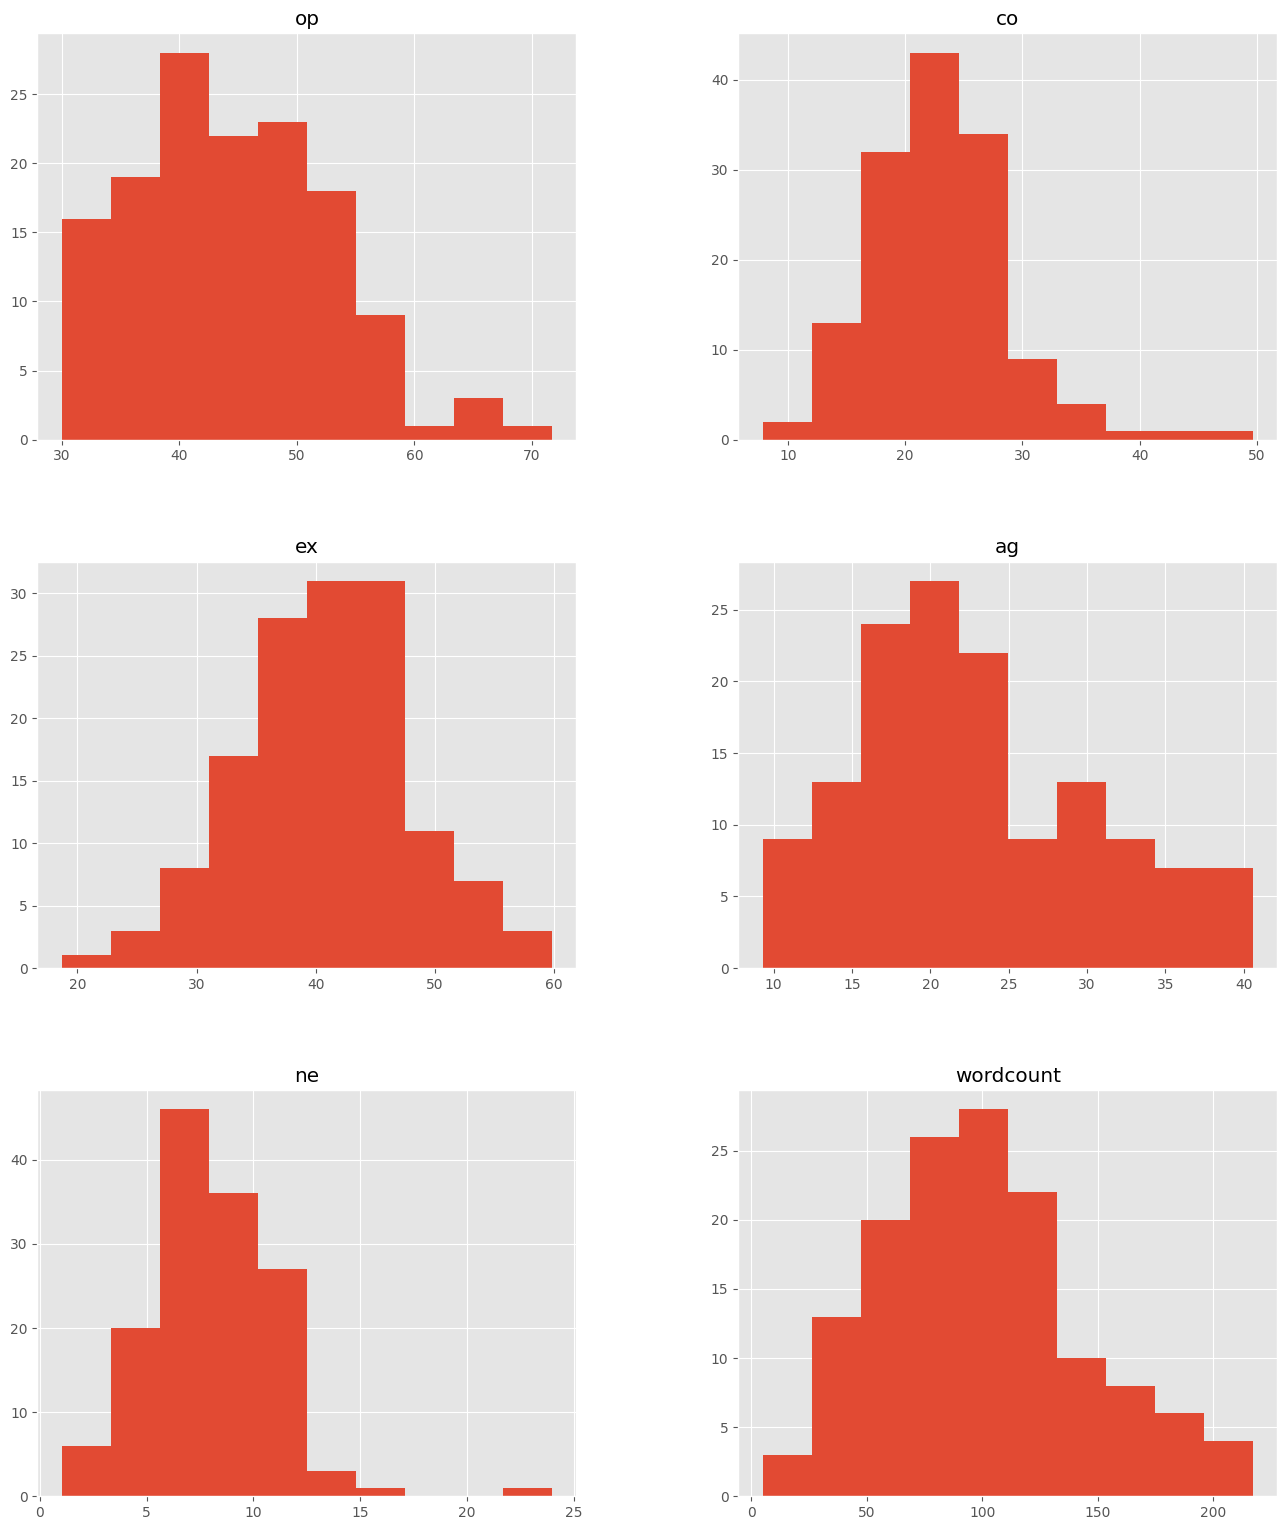

In [8]:
dataframe.drop(['categoria'],axis=1).hist()
plt.show()

c:\Users\gaels\OneDrive\Escritorio\Cursos de Machine Learning\VirtualMachine\DeepLearning\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


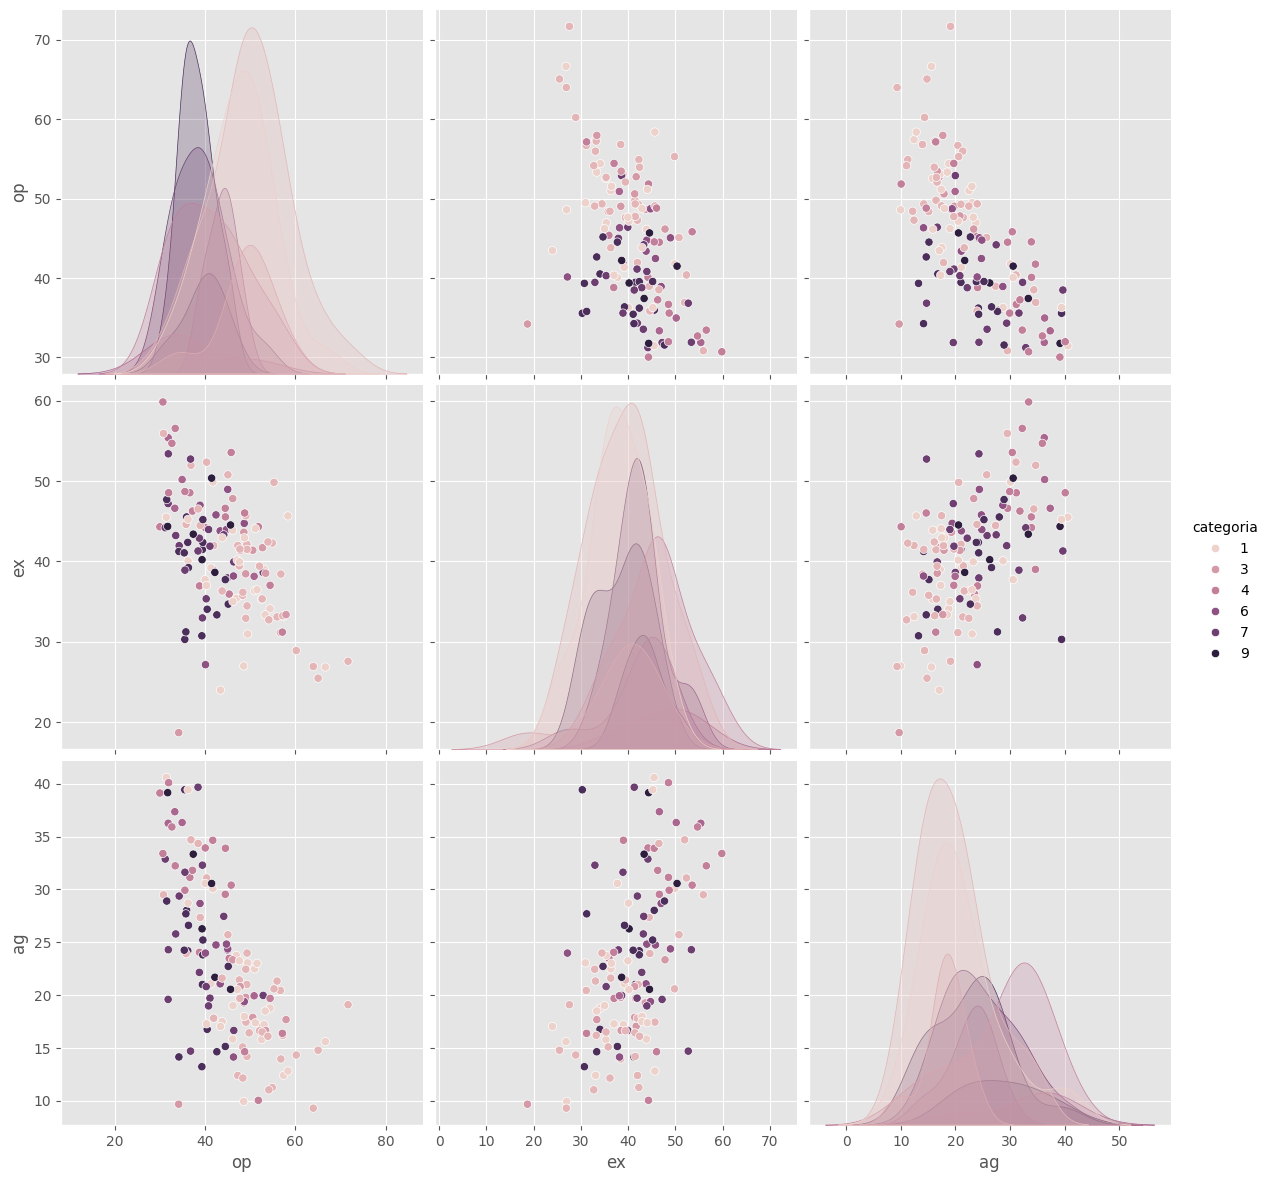

In [9]:
sb.pairplot(dataframe.dropna(),hue='categoria',size=4,vars=['op','ex','ag'],kind='scatter')


## Definimos la entrada

In [12]:
x=np.array(dataframe[['op','ex','ag']])
y=np.array(dataframe['categoria'])
x.shape

(140, 3)

In [1]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
#Nota: Esta es la nueva forma de mostrar un grafico 3d, el 111, representa una dimención por cada 1 puesto
#Nota2: el 111 puede ser cambiado por numeros siguientes al uno, pero esto solo incrementara el zoom de los datos del grafico
# no recomiendo hacer esto
colores =['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar = []
for row in y:
    asignar.append(colores[row])
ax.scatter(x[:,0],x[:,1],x[:,2],c=asignar,s=60)
# Nota: x[:"dimension"], el numero a la derecha representa la dimensión en la que se va a dibujar el punto
# en especifico 0 = x, 1 = y, 2 = z, etc... 
# Nota2: "s" es el tamaño de cada punto en el grafico
plt.show()

NameError: name 'plt' is not defined

## Obteninedo el valor de K


c:\Users\gaels\OneDrive\Escritorio\Cursos de Machine Learning\VirtualMachine\DeepLearning\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gaels\OneDrive\Escritorio\Cursos de Machine Learning\VirtualMachine\DeepLearning\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gaels\OneDrive\Escritorio\Cursos de Machine Learning\VirtualMachine\DeepLearning\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X,

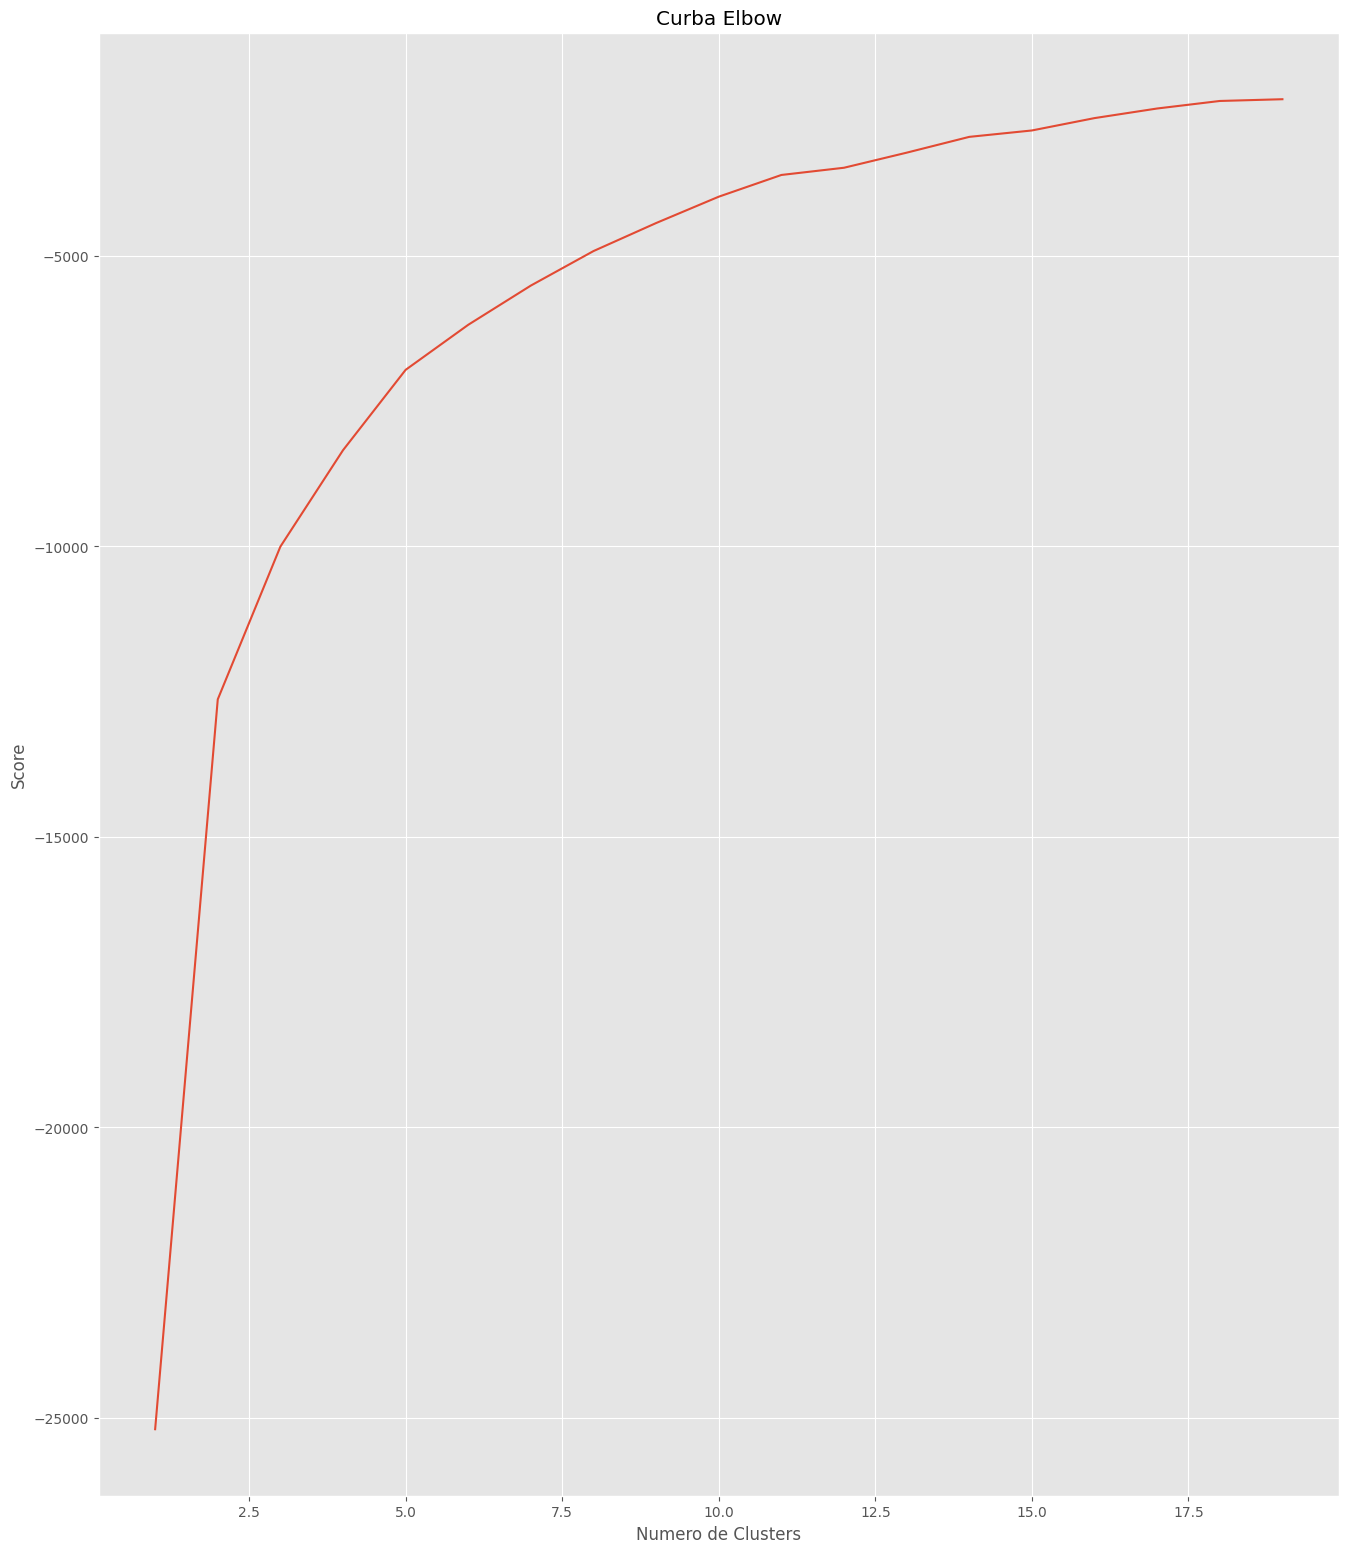

In [31]:
Nc = range(1,20)
Kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [Kmeans[i].fit(x).score(x) for i in range(len(Kmeans))]

plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Score')
plt.title('Curba Elbow')
plt.show()

## Ejecutamos K-Means

In [32]:
Kmeans = KMeans(n_clusters=5).fit(x)
centroids = Kmeans.cluster_centers_
print(centroids)

[[42.66891482 33.31008136 21.11530482]
 [49.85887044 41.15660338 17.54193885]
 [39.11608832 44.2747971  24.07124206]
 [35.98785863 47.6500119  34.38723913]
 [57.92200861 31.5039735  15.67199517]]


c:\Users\gaels\OneDrive\Escritorio\Cursos de Machine Learning\VirtualMachine\DeepLearning\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Graficamos las agrupaciones creadas en 3D
(las estrellas marcan el centro de cada cluster)

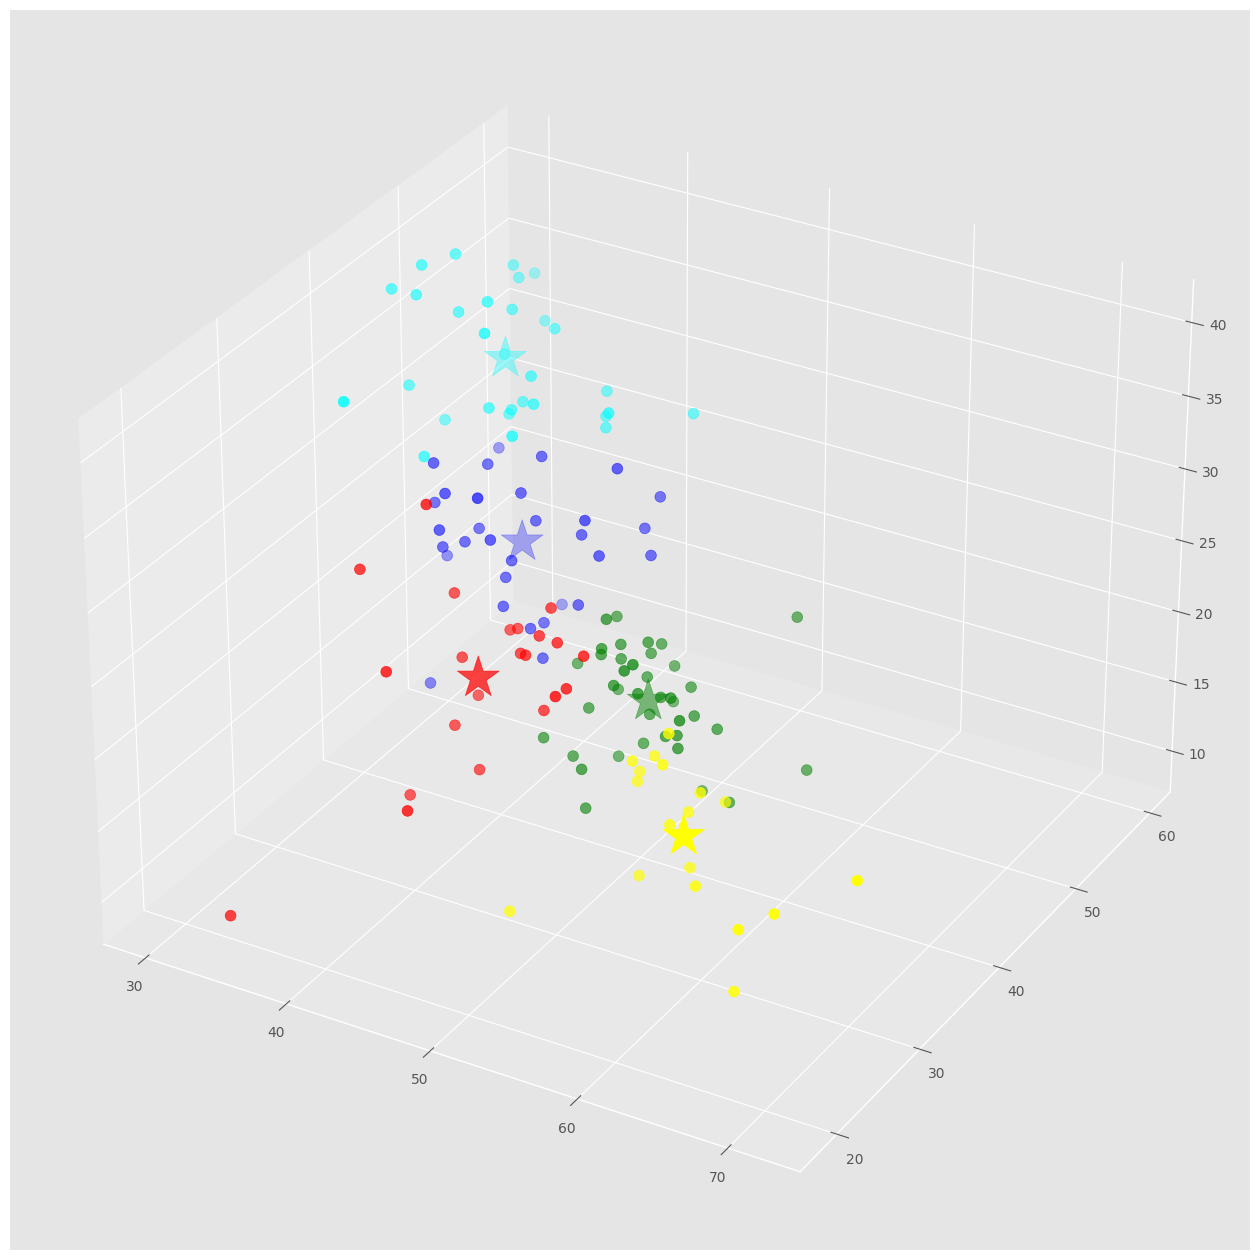

In [42]:
#Prediccion de clusters
labels = Kmeans.predict(x)
#Obteniendo centro de clusters
C = Kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(x[:,0],x[:,1],x[:,2],c=asignar,s=60)
ax.scatter(C[:,0],C[:,1],C[:,2],marker='*',c=colores,s=1000)
plt.show()

## Mostramos la grafica en 2D

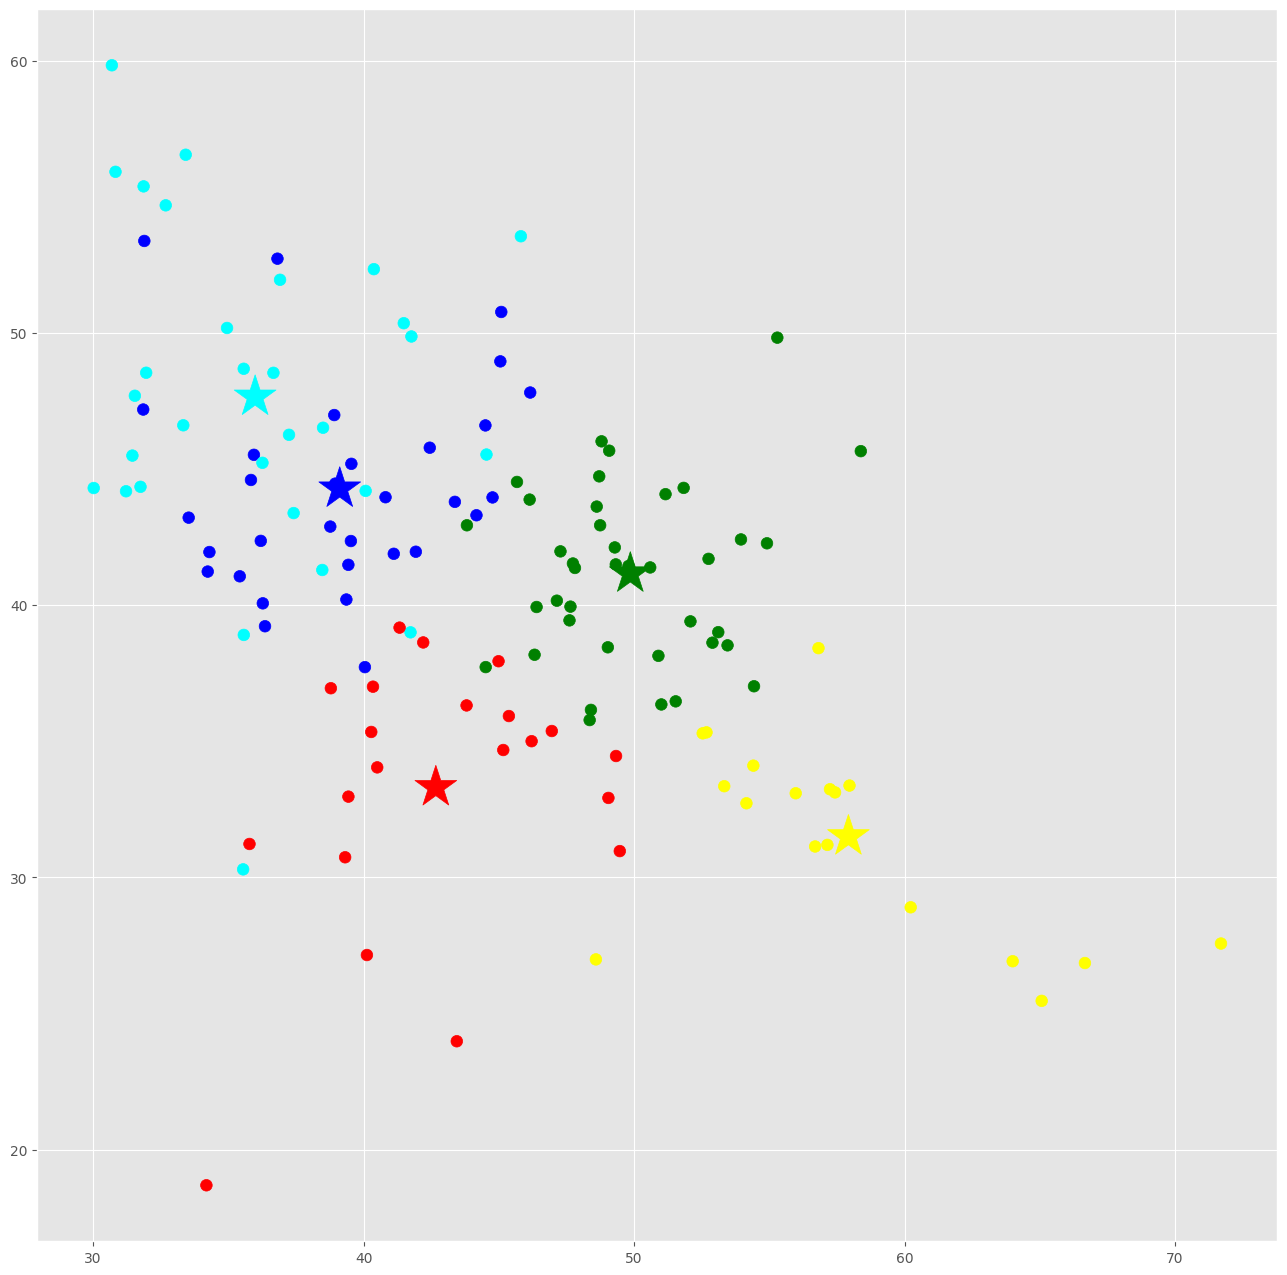

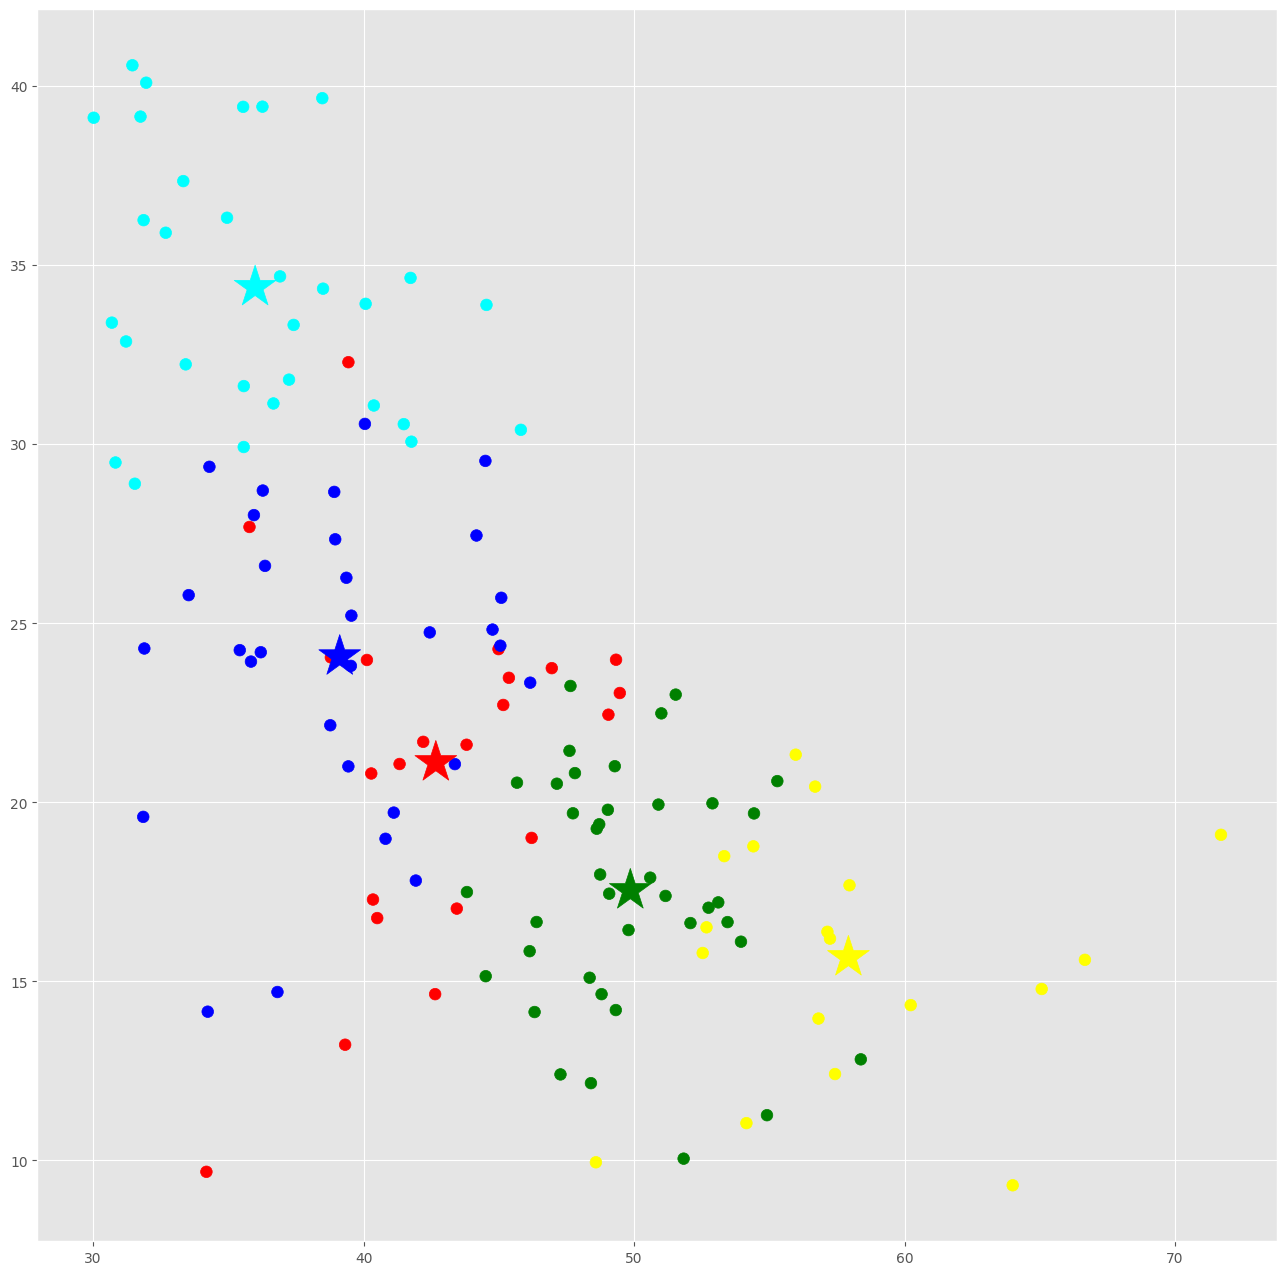

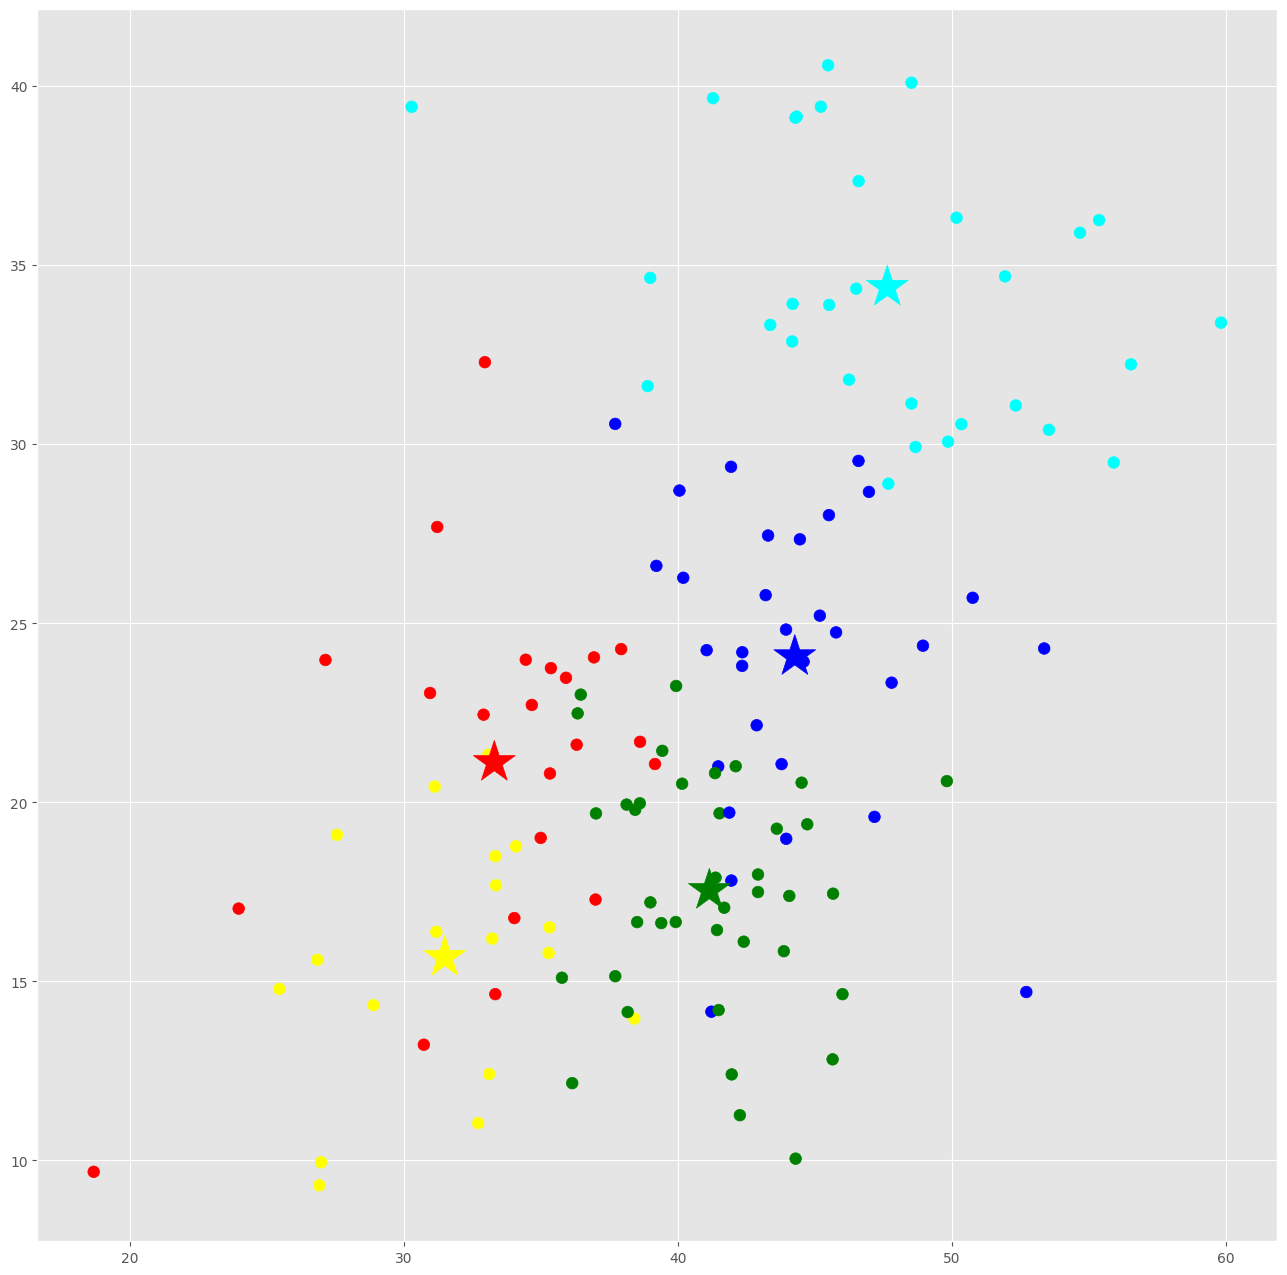

In [47]:
f1 = dataframe['op'].values
f2 = dataframe['ex'].values
f3 = dataframe['ag'].values

plt.figure(figsize=(16,16))
plt.scatter(f1,f2,c=asignar,s=70)
plt.scatter(C[:,0],C[:,1],marker='*',c=colores,s=1000)
plt.show()
plt.figure(figsize=(16,16))
plt.scatter(f1,f3,c=asignar,s=70)
plt.scatter(C[:,0],C[:,2],marker='*',c=colores,s=1000)
plt.show()
plt.figure(figsize=(16,16))
plt.scatter(f2,f3,c=asignar,s=70)
plt.scatter(C[:,1],C[:,2],marker='*',c=colores,s=1000)
plt.show()

## Mostramos cantidades de los clusters creados

In [48]:
copy = pd.DataFrame()
copy['usuario'] = dataframe['usuario'].values
copy['categoria'] = dataframe['categoria'].values
copy['label']=labels
grupo=pd.DataFrame()
grupo['color']=colores
grupo['cantidad']=copy.groupby('label').size()
grupo


,color,cantidad
0,red,22
1,green,39
2,blue,31
3,cyan,30
4,yellow,18


In [55]:
grupoNum_index = copy['label']==0
grupoNum = copy[grupoNum_index]

grupoDiv = pd.DataFrame()
grupoDiv['categoria']=[x for x in range(10)]
grupoDiv['cantidad']=grupoNum.groupby('categoria').size()
grupoDiv


,categoria,cantidad
0,0,NaN
1,1,6.0
2,2,3.0
3,3,1.0
4,4,2.0
5,5,NaN
6,6,1.0
7,7,3.0
8,8,5.0
9,9,1.0


#### Hacemos predicciones 

In [57]:
xNew = np.array([[45.92,57.74,15.66]])

new_labels = Kmeans.predict(xNew)
print(new_labels)

[1]
